In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data
* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [7]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [11]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [13]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [14]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [16]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [17]:
# We can try filling the sex value in instead od dropping it.

In [22]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [23]:
# So after comparing and analyzing it looks like the data is from female category let's assign it

In [24]:
df.at[336,'sex'] = 'FEMALE'

In [25]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm       217
body_mass_g            4875
sex                  FEMALE
Name: 336, dtype: object

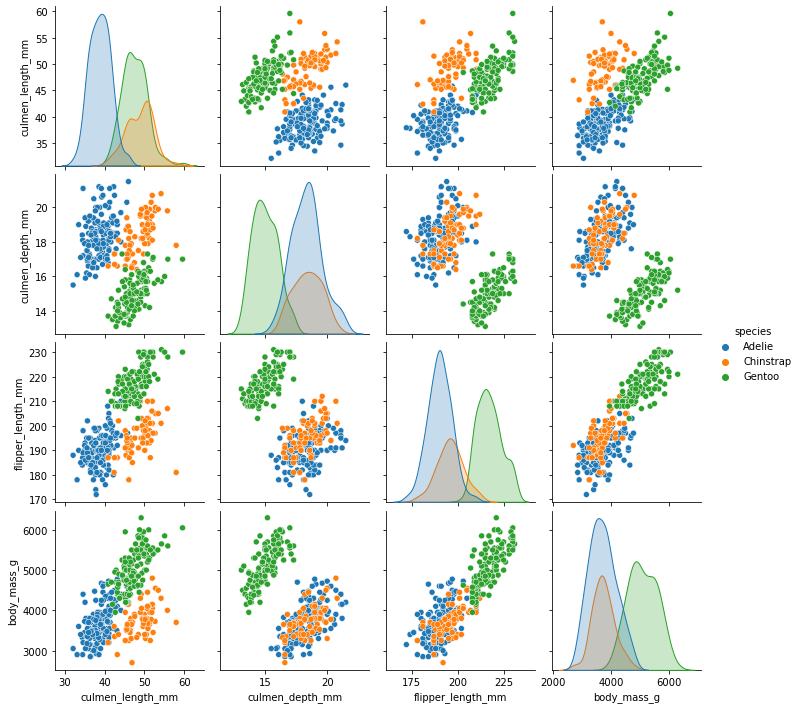

In [27]:
sns.pairplot(data=df,hue='species');

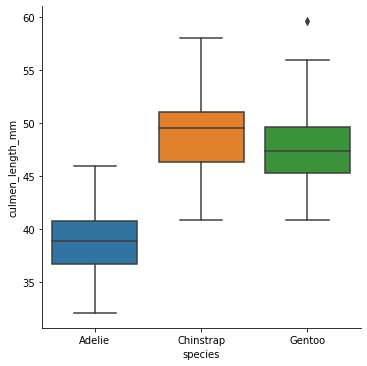

In [28]:
sns.catplot(x='species', y='culmen_length_mm', data=df, kind = 'box');

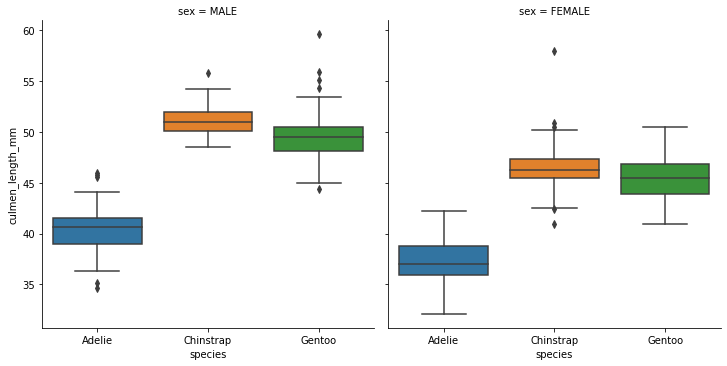

In [29]:
sns.catplot(x='species', y='culmen_length_mm', data=df, kind = 'box', col='sex');

In [30]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

#### Though we studied that Decision trees can take in multiple categorical inputs, but the way scikit-learn is built we need to convert them into dummy variables.

In [31]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [32]:
# But we only want to do it for the input features and not the output - species

In [34]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [35]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [36]:
y = df['species']

##### As we are creating a tree like structure we dont really need feature scaling cause at teh the leaf we will be seperating out each cat differently, so we dont care if some features are too off also, so we can go directly to train test split.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3 , random_state=101)

## Creating Decision Tree

1. Now let's go ahead and create a decision tree classifier just using the default hyper parameters.

2. Then we'll set up a visualization function that will allow us to actually see in real time the effect of changing certain hyper parameter values.

In [40]:
from sklearn.tree import DecisionTreeClassifier

#### Creating a basic model with default hyperparameters values

In [41]:
model = DecisionTreeClassifier()

In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
base_preds = model.predict(X_test)

In [44]:
base_preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adel

In [45]:
# Evauation

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [47]:
accuracy_score(y_test, base_preds)

0.9801980198019802

In [49]:
confusion_matrix(y_test,base_preds)

array([[40,  1,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

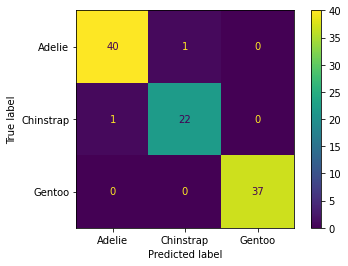

In [54]:
plot_confusion_matrix(model,X_test,y_test);

In [55]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



#### As we saw in the pairplots that their was clear seperation b/w the classes, which helped us get maximum accuracy.

In [56]:
model.feature_importances_

array([0.33754639, 0.05221421, 0.53120101, 0.        , 0.0681854 ,
       0.        , 0.01085298])

In [59]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

### So the above shows us the feature importance, for each of the feature.

In [62]:
pd.DataFrame({'Feature':X.columns, 'Imporatance':model.feature_importances_}).sort_values('Imporatance')

,Feature,Imporatance
3,body_mass_g,0.000000
5,island_Torgersen,0.000000
6,sex_MALE,0.010853
1,culmen_depth_mm,0.052214
4,island_Dream,0.068185
0,culmen_length_mm,0.337546
2,flipper_length_mm,0.531201


#### So we can see it is not even considering features like body mass and island, it is because we are using a base model with default hyperparameter values, we are not pushing the model hyperparameter to go that deep .

In [63]:
from sklearn.tree import plot_tree

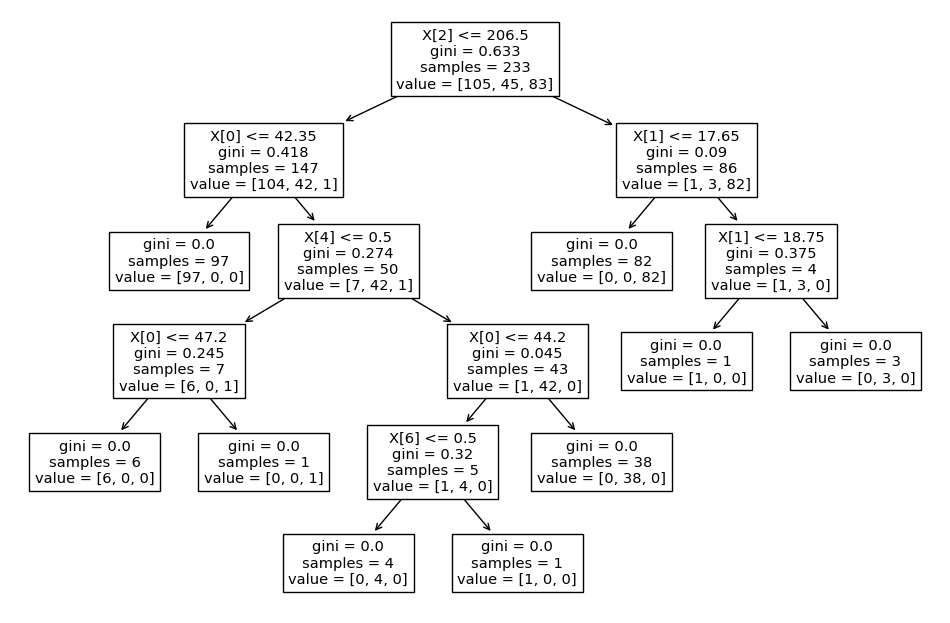

In [70]:
plt.figure(figsize=(12,8), dpi=100)
plot_tree(model);

In [71]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
194,50.9,19.1,196.0,3550.0,1,0,1
22,35.9,19.2,189.0,3800.0,0,0,0
92,34.0,17.1,185.0,3400.0,1,0,0
149,37.8,18.1,193.0,3750.0,1,0,1
156,52.7,19.8,197.0,3725.0,1,0,1
...,...,...,...,...,...,...,...
81,42.9,17.6,196.0,4700.0,0,1,1
93,39.6,18.1,186.0,4450.0,1,0,1
69,41.8,19.4,198.0,4450.0,0,1,1
335,55.1,16.0,230.0,5850.0,0,0,1


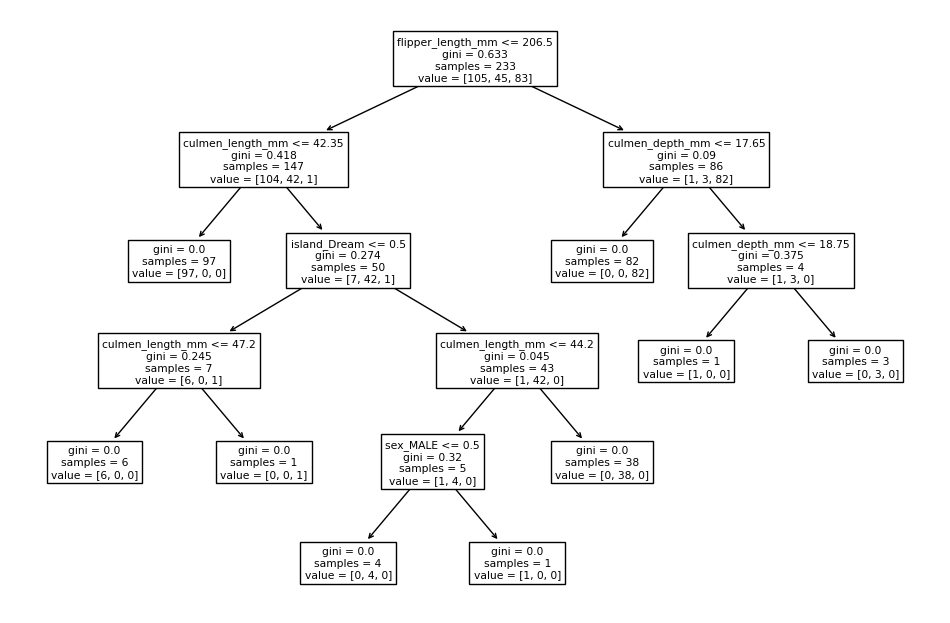

In [72]:
plt.figure(figsize=(12,8), dpi=100)
plot_tree(model, feature_names=X.columns);

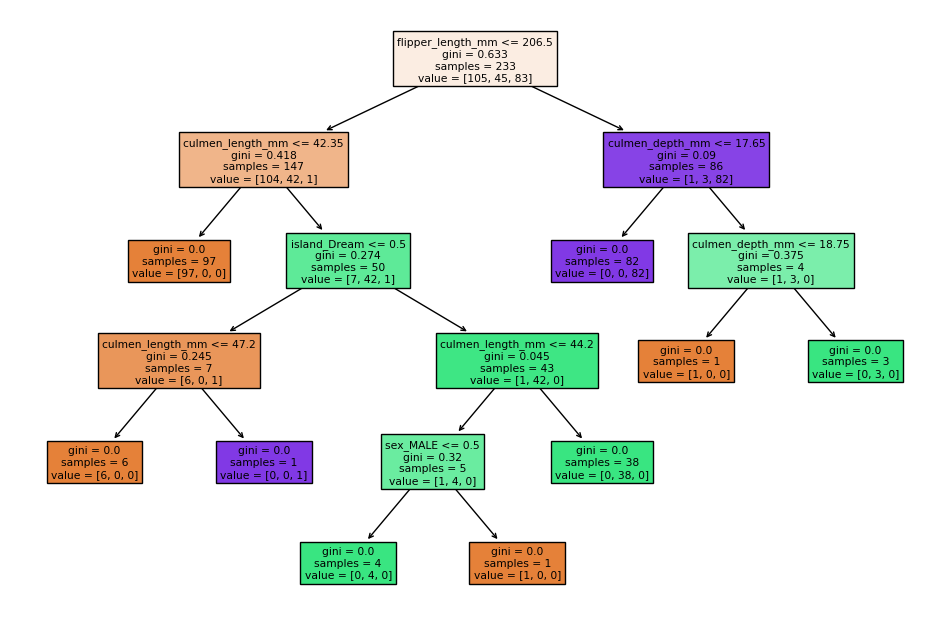

In [73]:
plt.figure(figsize=(12,8), dpi=100)
plot_tree(model, feature_names=X.columns,filled=True);

1. So as we saw in feature importance that flipper_length_mm was most imp , the decision tree starts with it as the root node.

2. gini, shows the gini value at that particular node.

3. samples, tells us how many samples the tree is taking in.

4. value[] = tells us the class to which that data point originally belonged to.

The leaf node stops splitting as the gini reaches zero, which means that at this stage it is able to perfectly seperate out the classes.

### Let's create a function that does all of this for our convinience

In [74]:
def report_model(model):
    model_pred = model.predict(X_test)
    print(classification_report(y_test, model_pred))
    print(sep='\n')
    plt.figure(figsize=(12,8), dpi=100)
    plot_tree(model, feature_names=X.columns,filled=True);

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101




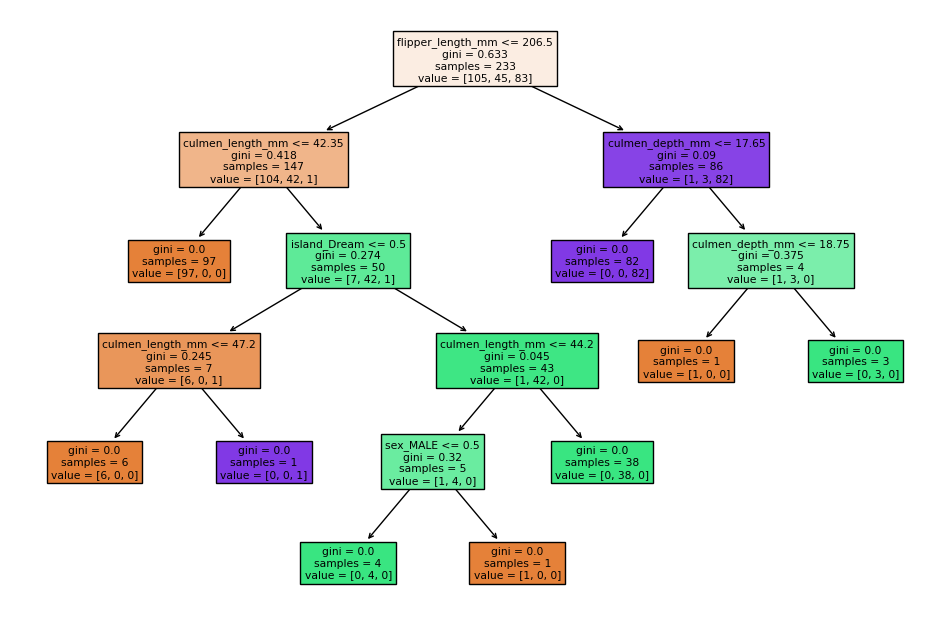

In [75]:
report_model(model)

### Now, we can really play around the model type of parameters and see how it affects everything, as well as see how it affects the actual decision tree.

#### So now we have Dcision Tree with 5 level depth, we can set a max depth value.

In [76]:
# creating a decision tree with maximum depth 2
pruned_tree = DecisionTreeClassifier(max_depth=2)

In [77]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101




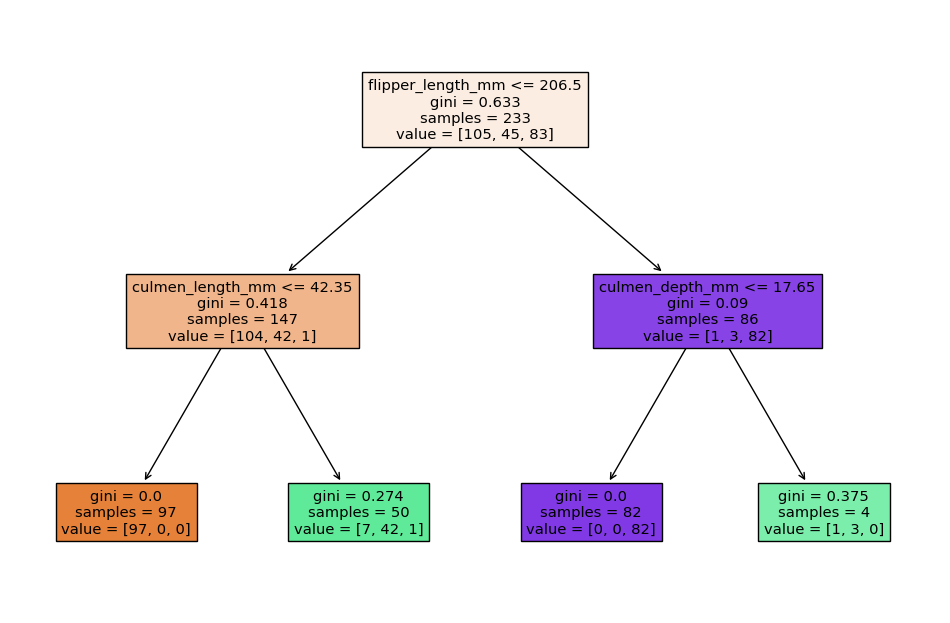

In [78]:
report_model(pruned_tree)

#### So with less depth level we see less accuracy

In [79]:
# creating a decision tree with maximum depth 3
pruned_tree2 = DecisionTreeClassifier(max_depth=3)

In [80]:
pruned_tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101




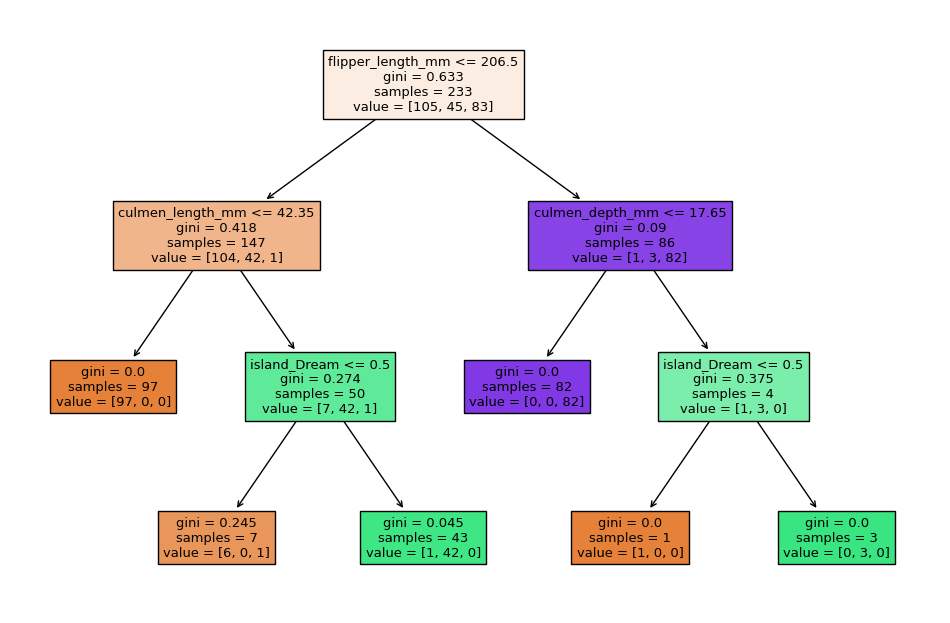

In [81]:
report_model(pruned_tree2)

### So we can see that the as we keep increasing the depth the accuracy increases, obviously because the gini impurity is decreasing.

#### Let's move to the Max leaf nodes

In [83]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

In [84]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101




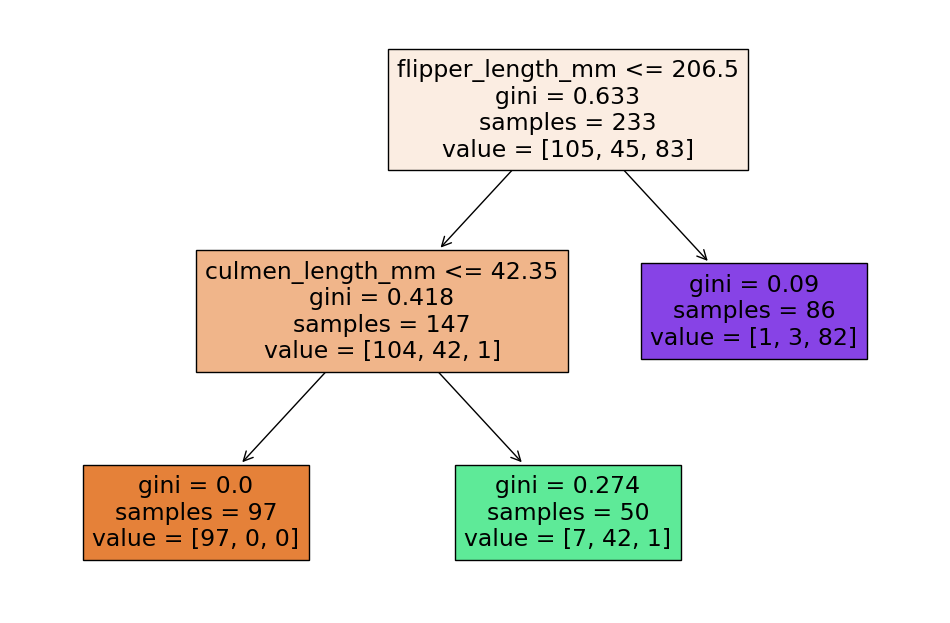

In [85]:
report_model(max_leaf_tree)

#### We can see the performance has significantly dropped, as this tree is only allowed to have 3 leaf nodes so it is not possible for the tree to do many splits.

#### But still it is performing quite well.

#### It is only misclassifying 7+1+1+3 =12 data points.

## Use of information gain criterion instead of Gini impurity.

So what were are doing is using a different mathematical criterion entropy instead of Gini for splitting.

In [86]:
entropy_model = DecisionTreeClassifier(criterion='entropy')

In [87]:
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101




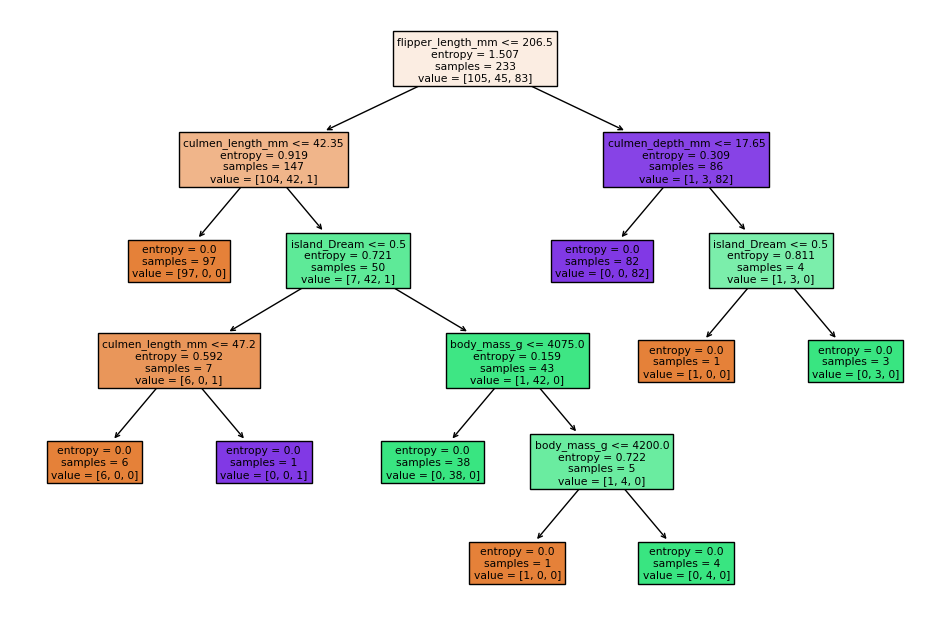

In [88]:
report_model(entropy_model)

#### We can see the model is performing quite well, the only difference here is entropy uses sifferent features at different levels for splitting than what the tree with gini used.